## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")

## Load the Dataset

In [4]:
df = pd.read_csv("D:\\Heart-Disease-EDA\\data\\heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Basic Data Inspection

In [5]:
# number of rows and columns
df.shape

(1025, 14)

In [6]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# statistics about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Check Missing Values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Check Duplicate Rows

In [9]:
df.duplicated().sum()

np.int64(723)

In [10]:
df = df.drop_duplicates()

## Understand Target Variable

In [11]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

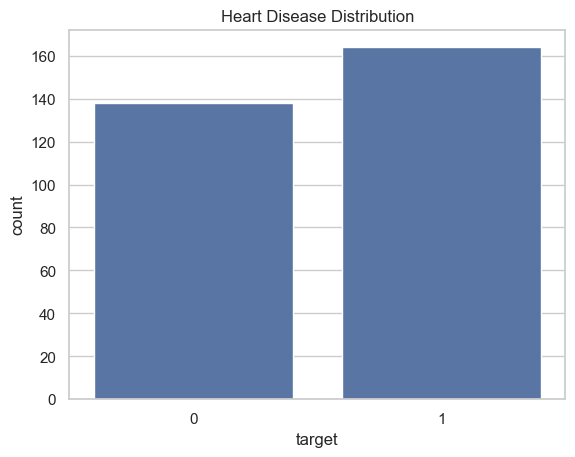

In [12]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

Interpretation:

0 → No disease;
1 → Disease present

Balanced dataset = good for ML later

## Below, I will do some univariate and bivariate analysis to understand the data better.

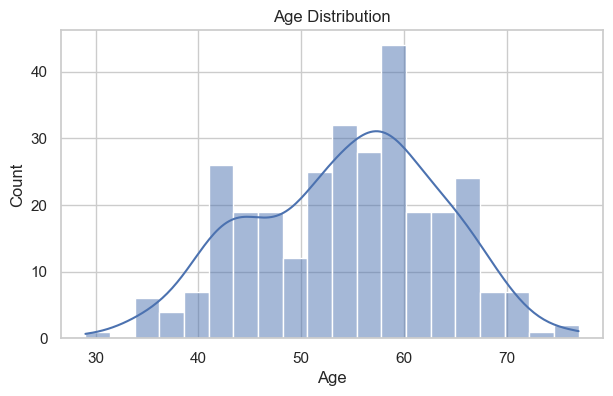

In [15]:
# Age Distribution: Age is a major risk factor for heart disease.
plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

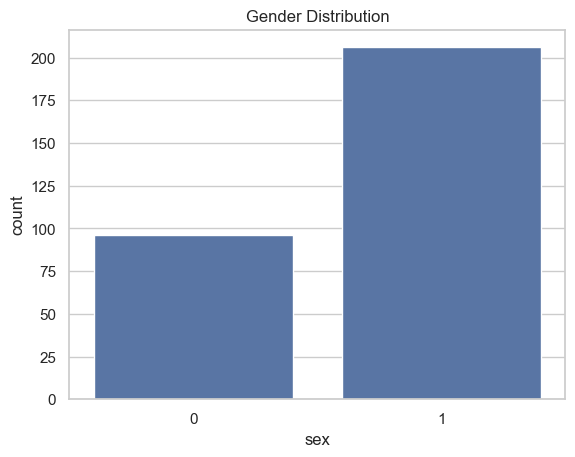

In [16]:
# Gender Distribution: 1 = male and 0 = female
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

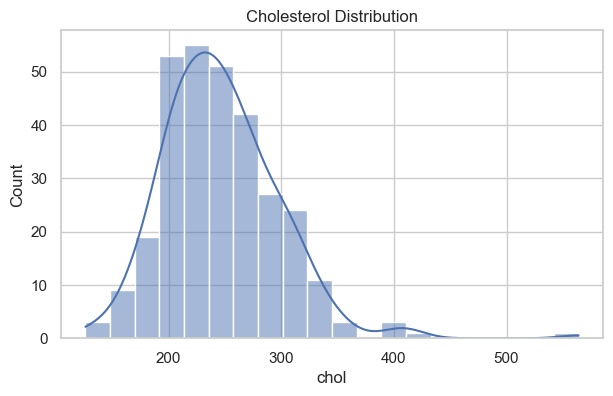

In [17]:
# Cholesterol Distribution: High cholesterol can lead to heart disease.
plt.figure(figsize=(7,4))
sns.histplot(df['chol'], bins=20, kde=True)
plt.title("Cholesterol Distribution")
plt.show()

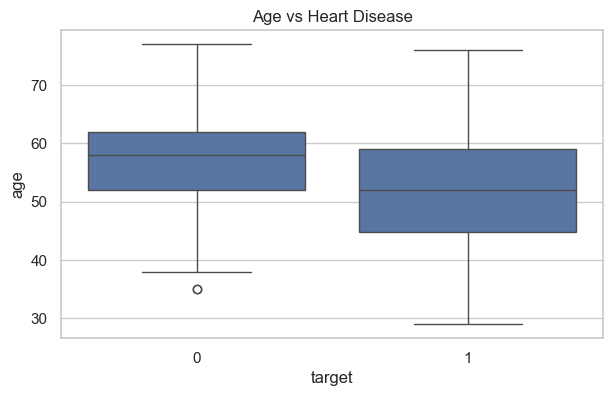

In [18]:
# Age vs Heart Disease Distribution
plt.figure(figsize=(7,4))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

I use boxplots because it shows median, spread, outliers and compare between groups. It is more informative than histograms for comparing distributions across categories (like target variable).

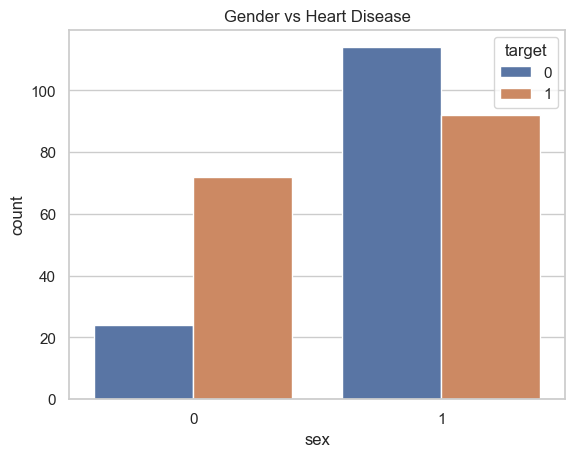

In [19]:
# Gender vs Heart Disease
sns.countplot(x='sex', hue='target', data=df)
plt.title("Gender vs Heart Disease")
plt.show()

Shows how disease differs between males & females

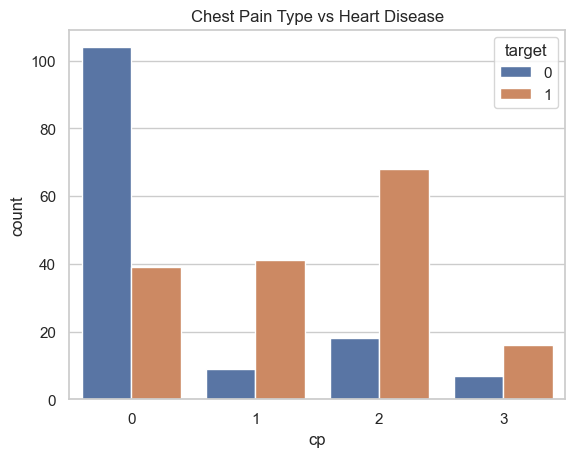

In [20]:
# Chest Pain Type vs Disease
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

Chest pain type is often one of the strongest indicators.

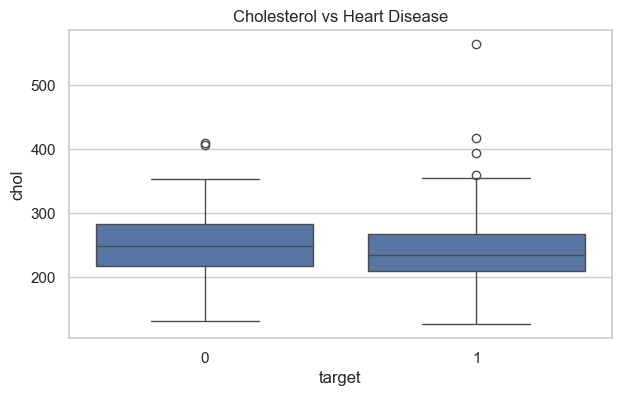

In [21]:
# Cholesterol vs Disease
plt.figure(figsize=(7,4))
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

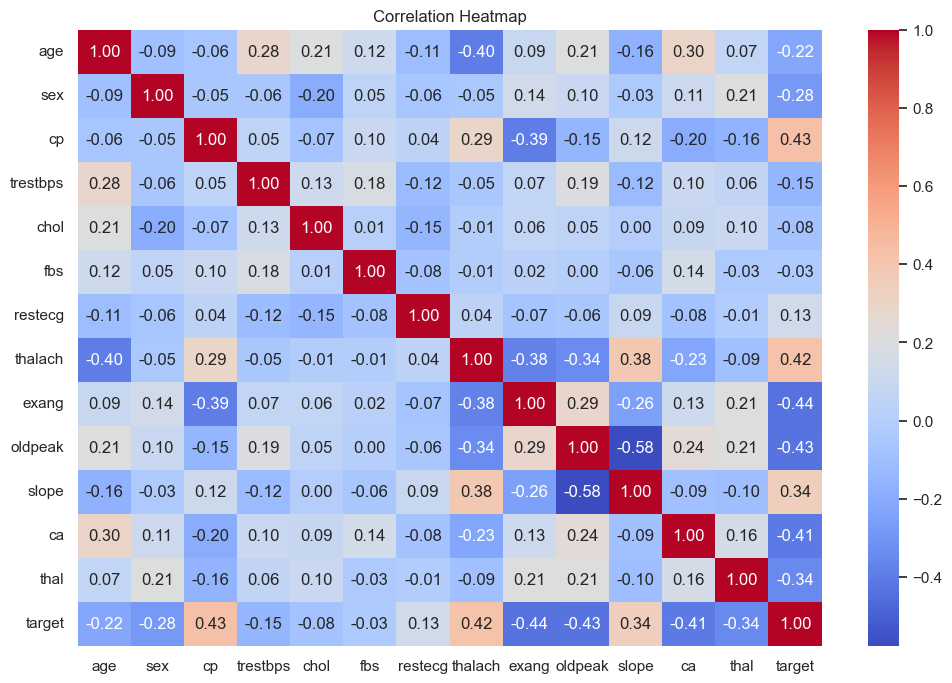

In [22]:
# Correlation Matrix
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Values range:

+1 → Strong positive relationship;
0 → No relationship;
-1 → Strong negative relationship

Look at correlation with target.

In [24]:
# Identify Key Predictors while excluding target
corr['target'].drop('target').sort_values(ascending=False)

cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

This shows which features are most related to heart disease.

## Key insights from EDA:

Heart disease is more common in older individuals.

Males show higher prevalence than females.

Certain chest pain types strongly indicate disease.

Exercise-induced angina correlates with heart problems.

Maximum heart rate achieved is inversely related to disease.